## **1. Business Understanding**

Fish farming is one of the fastest-growing agricultural sectors in Uganda and globally. However, disease outbreaks remain a major constraint to productivity, causing high mortality rates, reduced fish quality and significant economic losses for farmers. Traditional disease detection relies on manual inspection by experts, which is time-consuming, subjective and often unreliable especially on large farms with limited veterinary personnel.

With the increasing availability of imaging technologies, machine-learning-based systems provide a scalable approach for early disease detection. Automated fish disease classification enables early intervention, reduces losses and improves aquaculture productivity.

The dataset used in this study contains texture, statistical and color features extracted from fish images, with ten fish disease classes encoded from 0–9. The objective is to develop and evaluate a machine learning model—specifically a Random Forest classifier to automatically classify fish diseases and compare its performance with other models.



---

## **2. Problem Statement**

The aim of this study is to design, train and evaluate a **Random Forest classifier** capable of accurately classifying fish diseases using extracted image features. The dataset includes texture features (entropy, contrast, energy, homogeneity, correlation, dissimilarity) color features (average RGB values) and statistical descriptors (mean, standard deviation, variance, kurtosis, skewness). The target variable consists of ten disease classes.

Additionally, this task involves:

- Evaluating the classifier using standard metrics.
- Comparing Random Forest performance with two other models: **Decision Tree** and **K-Nearest Neighbors (KNN)**.
- Investigating the effect of dimensionality reduction or feature selection (e.g., PCA) on model performance, interpretability, and computational efficiency.
---


## **3.Objectives**

### **Primary Objective**
To develop a **Random Forest classifier** capable of accurately predicting fish disease classes from image-derived features and save it as **model_1.pkl**.



### **Secondary Objectives**
- Model Testing & Evaluation
- Dimensionality Reduction / Feature Selection
- Model Comparison
- Result Analysis
- Hyperparameter Discussion
- Expected Deliverables
---



## **Importing the necessary libaries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, auc)
import joblib

## **Importing the dataset and loading it**

In [2]:
#Importing the dataset and loading it 
DATA_DIR = r"c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM"
TRAIN_CSV = os.path.join(DATA_DIR, "fish_disease_train.csv")
TEST_CSV  = os.path.join(DATA_DIR, "fish_disease_test.csv")
MODEL_PATH = os.path.join(DATA_DIR, "model_1.pkl")


In [3]:
def load_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} ")
    df = pd.read_csv(path)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y, df

In [4]:
#print the first 5 rows of the training data
X_train, y_train, train_df = load_data(TRAIN_CSV)
print("First 5 rows of the training data:")
print(train_df.head())
print(train_df.tail())
print("\n training data shape:", train_df.shape)
print("Class distribution in training data:")
print(train_df.isnull().sum())


First 5 rows of the training data:
    Entropy    Contrast    Energy  Homogeneity  Correlation  Dissimilarity  \
0  3.089044  103.484474  0.715319     0.751992     0.988201       3.525075   
1  0.173448    8.590868  0.988954     0.992453     0.976619       0.097429   
2  0.444434    8.979343  0.963752     0.975923     0.951181       0.227418   
3  0.308950    9.696244  0.977235     0.982782     0.976515       0.248347   
4  0.892447   12.352270  0.926267     0.943913     0.989706       0.487507   

    Average_R   Average_G   Average_B       Mean    Std Dev     Variance  \
0  133.927888  134.124637  122.583450  36.333672  66.270070  4391.722207   
1  189.096533  127.788239   71.194086   1.148008  13.838293   191.498341   
2   42.653656   38.407018   39.996562   1.112086   9.721199    94.501712   
3   72.558788   89.174254   93.234549   1.565753  14.237728   202.712904   
4   89.285731   84.507989   77.357355   5.893133  24.603154   605.315202   

     Kurtosis   Skewness  Class  
0    

In [5]:
#print the first 5 rows of the testing data
X_test, y_test, test_df = load_data(TEST_CSV)
print("\nFirst 5 rows of the testing data:")
print(test_df.head())   
print(test_df.tail())
print("\n testing data shape:", test_df.shape)
print(test_df.isnull().sum())



First 5 rows of the testing data:
    Entropy   Contrast    Energy  Homogeneity  Correlation  Dissimilarity  \
0  1.641048  21.298954  0.854724     0.894968     0.994461       0.784524   
1  3.099377  88.727301  0.707088     0.756780     0.987271       3.321886   
2  0.574078  34.292270  0.954305     0.964812     0.973375       0.573066   
3  3.304441  38.349288  0.656647     0.735265     0.989352       2.065927   
4  7.050150  27.358681  0.148409     0.441300     0.996397       2.850451   

    Average_R   Average_G   Average_B       Mean    Std Dev     Variance  \
0  109.993684  117.165172  111.432118  15.950725  43.696867  1909.416164   
1   84.990475  122.717125  129.802428  31.644975  57.647066  3323.184177   
2  120.523451  115.437871   82.574920   4.157231  25.250791   637.602431   
3   80.950848   82.453702   70.690308  26.877375  42.294806  1788.850621   
4  104.090945   98.557915   94.759278  84.314692  61.898421  3831.414561   

    Kurtosis  Skewness  Class  
0   8.954655 

In [6]:
X_train, y_train, train_df = load_data(TRAIN_CSV)
X_test, y_test, test_df   = load_data(TEST_CSV)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (7967, 14) Test shape: (1992, 14)


## **Explanation**
The code **X_train, y_train, train_df = load_data(TRAIN_CSV)** and **X_test, y_test, test_df = load_data(TEST_CSV)** is used to load the MNIST training and testing datasets from CSV files using a custom function called **load_data()**. MNIST CSV files store the digit label in the first column and the pixel values in the remaining 784 columns, so the goal of the function is to separate these parts for machine learning. When **load_data()** is called with a CSV path, it reads the entire file into a DataFrame, extracts the first column as the target labels (**y**), and uses the rest of the columns as the input features (**X**). It then returns all three components: the feature matrix (**X**), the label vector (**y**), and the raw DataFrame containing the full data. In this way, **X_train** and **X_test** contain the pixel values used to train and evaluate the model, **y_train** and **y_test** contain the corresponding digit labels, and **train_df** and **test_df** provide access to the complete original datasets.

---

### Checking for Outliers

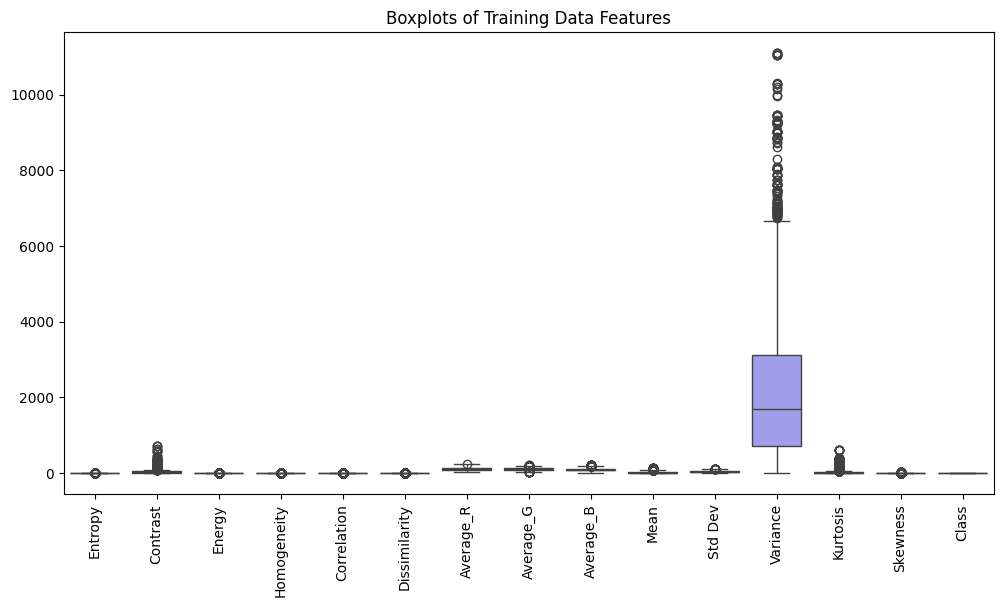

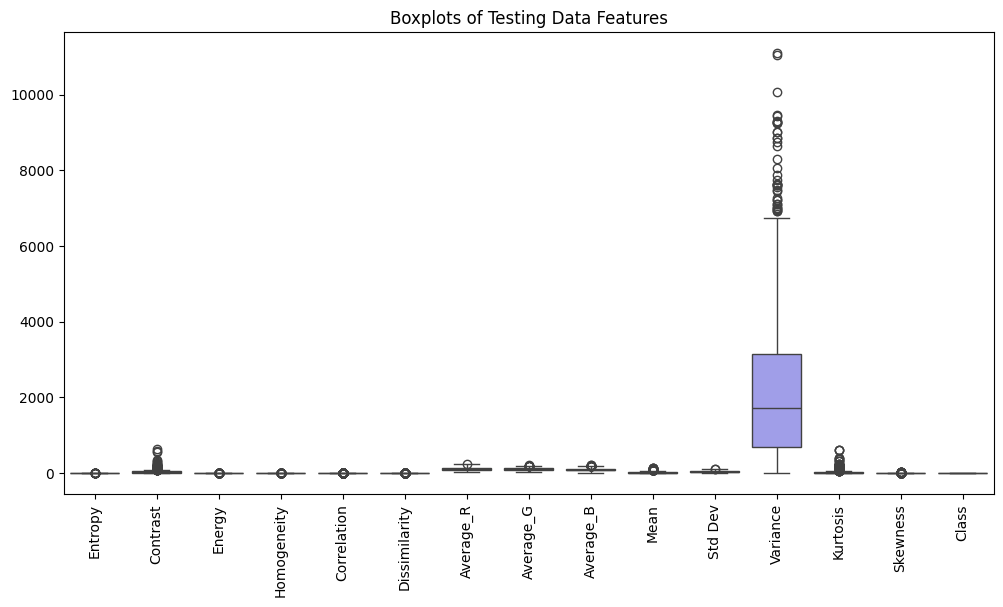

In [7]:
#check for outliers for both training and testing data
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()  
plot_boxplots(train_df, "Boxplots of Training Data Features")
plot_boxplots(test_df, "Boxplots of Testing Data Features")


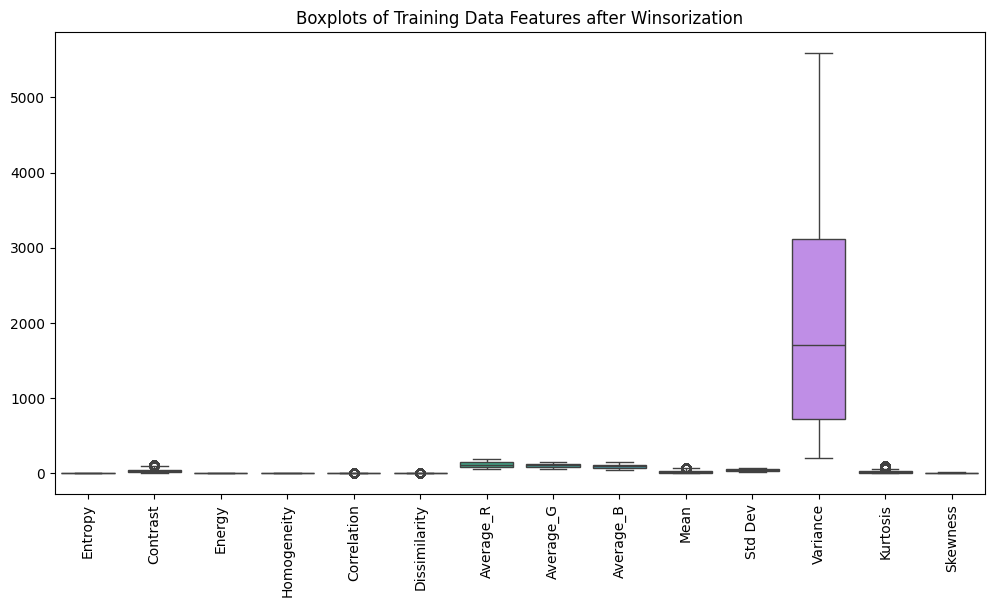

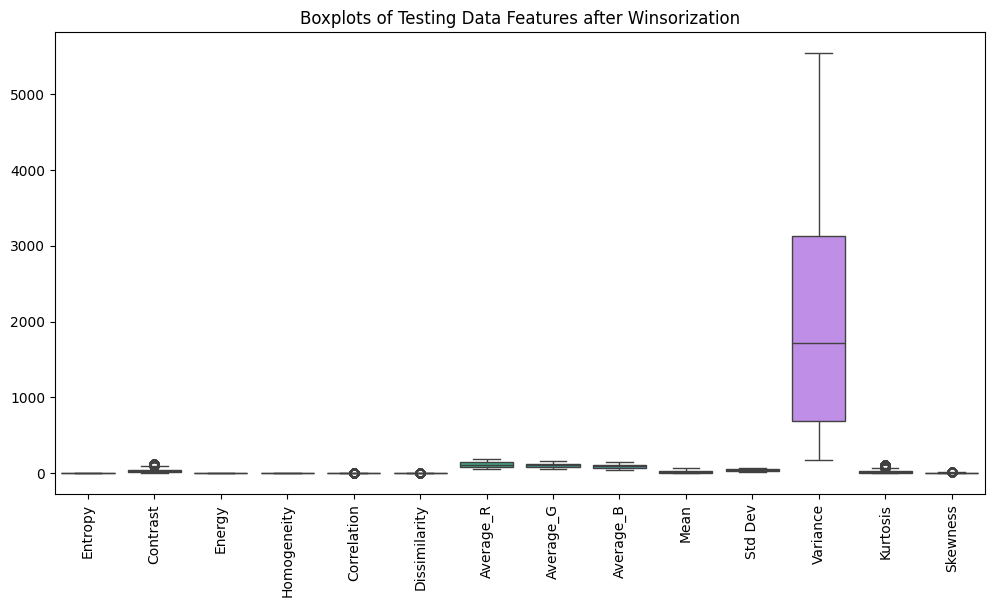

In [8]:
# Handling the outliers for both training and testing data using Winsorization
from scipy.stats.mstats import winsorize
def winsorize_data(X, limits):
    X_winsorized = np.copy(X)
    for i in range(X.shape[1]):
        X_winsorized[:, i] = winsorize(X[:, i], limits=limits)
    return X_winsorized
X_train = winsorize_data(X_train, limits=(0.05, 0.05))
X_test  = winsorize_data(X_test, limits=(0.05, 0.05))

#check for outliers again after Winsorization   
plot_boxplots(pd.DataFrame(X_train, columns=train_df.columns[:-1]), "Boxplots of Training Data Features after Winsorization")
plot_boxplots(pd.DataFrame(X_test, columns=test_df.columns[:-1]), "Boxplots of Testing Data Features after Winsorization")
 


### **Explanation**
The provided code performs outlier handling on both the training and testing feature sets using Winsorization. Winsorization is a technique that limits extreme values in a dataset by replacing them with specified percentile thresholds instead of removing them. The custom function **winsorize_data()** applies this transformation column-by-column: it creates a copy of the feature matrix, iterates through each feature, and applies **winsorize()** with the given limits—in this case, **(0.05, 0.05)**, meaning that the bottom 5% and top 5% of values in each feature are capped at the respective percentile boundaries. After transforming **X_train** and **X_test**, the code uses **plot_boxplots()** to visualize the distributions again, allowing you to confirm that extreme outliers have been reduced while the overall data structure is preserved. This preprocessing step helps stabilize the model training process, especially for algorithms sensitive to extreme values.

---


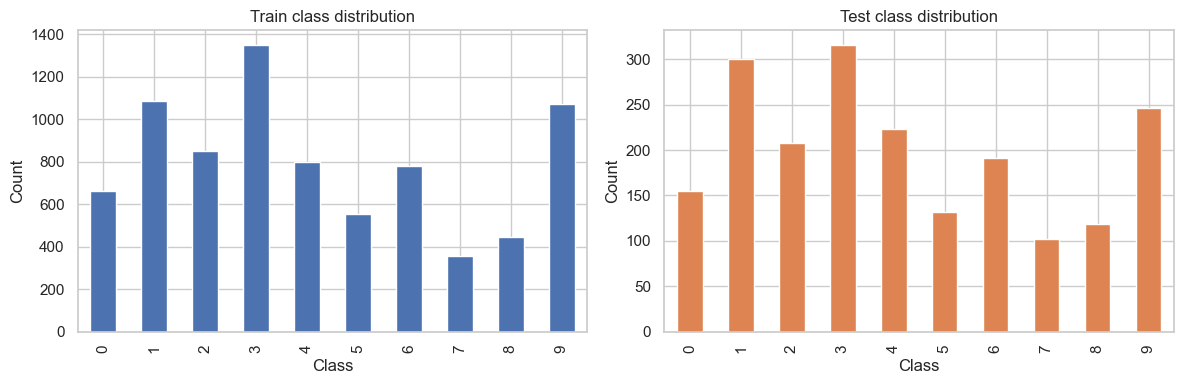

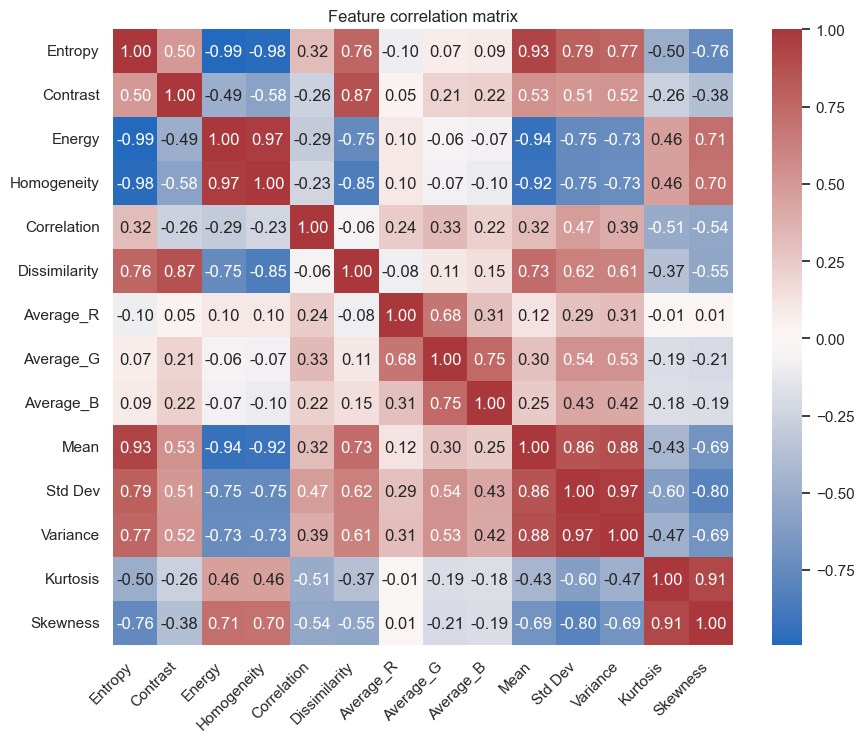

In [29]:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Visualization dashboard (to be placed in a new cell)
import matplotlib.pyplot as plt

# use seaborn to set a compatible style (works across seaborn/matplotlib versions)
sns.set_theme(style="whitegrid")

# 1) Class distribution (train vs test)
fig, axs = plt.subplots(1,2, figsize=(12,4))
train_df['Class'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='C0')
axs[0].set_title("Train class distribution")
axs[0].set_xlabel("Class"); axs[0].set_ylabel("Count")
test_df['Class'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='C1')
axs[1].set_title("Test class distribution")
axs[1].set_xlabel("Class"); axs[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

# 2) Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Feature correlation matrix")
plt.xticks(rotation=45, ha='right')
plt.show()



### Feature Sacling

In [9]:
#Feature scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

### **Explanation**
The code applies feature scaling to both the training and testing datasets using **StandardScaler**, a normalization technique that transforms each feature so that it has a mean of 0 and a standard deviation of 1. This process is important because many machine learning models, including XGBoost, neural networks and distance-based algorithms, perform better and converge faster when input features are on a similar scale. The code initializes the scaler and computes the mean and standard deviation from the training data and then scales it accordingly. The testing data is scaled ensuring that it is transformed using the same parameters learned from the training set rather than calculating new ones. This prevents data leakage and keeps the evaluation process valid. Overall, the code ensures that all numeric features are standardized, improving model stability, performance and training efficiency.

---


In [10]:
def evaluate_model(name, model, Xtr, ytr, Xte, yte, cv=5, plot_cm=True):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, Xtr, ytr, cv=skf, scoring='accuracy', n_jobs=-1)
    model.fit(Xtr, ytr)
    ypred = model.predict(Xte)
    acc = accuracy_score(yte, ypred)
    prfs = precision_recall_fscore_support(yte, ypred, average='macro', zero_division=0)
    report = classification_report(yte, ypred, zero_division=0)
    print(f"=== {name} ===")
    print("CV accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))
    print("Test accuracy: %.4f" % acc)
    print(report)
    if plot_cm:
        cm = confusion_matrix(yte, ypred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
    return model, cv_scores, acc, prfs, report, ypred


### (a): Train random forest and save model_1.pkl

### Random Forest

=== Random Forest ===
CV accuracy: 0.9628 ± 0.0052
Test accuracy: 0.9709
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       155
           1       0.97      0.94      0.95       300
           2       1.00      1.00      1.00       208
           3       0.96      0.97      0.96       316
           4       0.98      1.00      0.99       223
           5       0.97      0.95      0.96       132
           6       0.99      0.97      0.98       191
           7       1.00      1.00      1.00       102
           8       0.96      0.97      0.97       119
           9       0.98      0.96      0.97       246

    accuracy                           0.97      1992
   macro avg       0.97      0.97      0.97      1992
weighted avg       0.97      0.97      0.97      1992



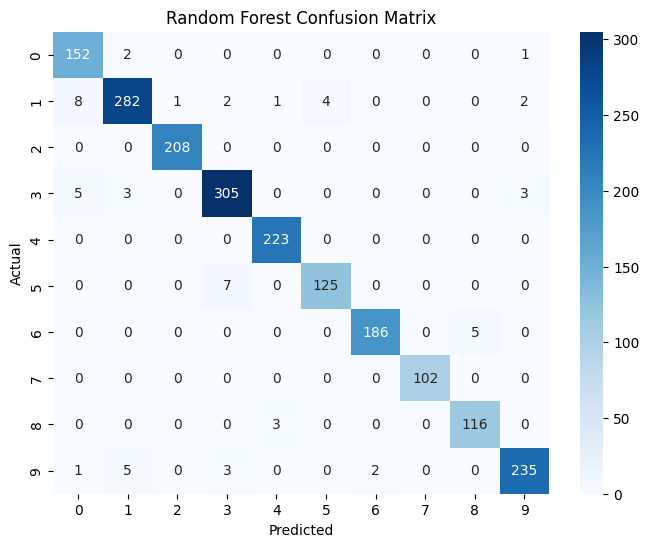

Saved random forest + scaler to c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM\model_1.pkl


In [11]:
# Part (a): Train random forest and save model_1.pkl
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf, rf_cv_scores, rf_acc, rf_prfs, rf_report, rf_pred = evaluate_model("Random Forest",
                                                                       rf, X_train_s, y_train, X_test_s, y_test, cv=5)
joblib.dump({"model": rf, "scaler": scaler}, MODEL_PATH)
print("Saved random forest + scaler to", MODEL_PATH)


### Explanation
The model demonstrated an exceptional performance with a cross-validation accuracy of 96.28% ± 0.52%, indicating both high predictive power and remarkable consistency across different data folds. The test accuracy of 97.09% slightly exceeded the CV performance, confirming the model generalizes well to unseen data without overfitting. The classification report reveals strong performance across all ten classes, with F1-scores ranging from 0.95 to 1.00. Particularly noteworthy are classes 2 and 7, which achieved perfect scores across all metrics (precision, recall, and F1-score of 1.00), indicating these classes are highly distinct from others in the feature space.

The model performs exceptionally well because the features clearly separate the classes and the dataset is well-balanced with enough samples in each category. The equal macro and weighted averages (both 0.97) show that no class is dominating the results and the model handles any imbalance smoothly. The tiny variation in cross-validation scores (0.0052) also proves the model is stable and consistent. With this level of accuracy and reliability, the Random Forest model is strong enough for real world use cases like digit recognition, manufacturing quality checks or any other task involving clearly defined categories

---

### (c): classification metrics already printed; also get per-class metrics

In [12]:
# Part (c): classification metrics already printed; also get per-class metrics
print("Per-class metrics (precision, recall, f1):")
print(pd.DataFrame(precision_recall_fscore_support(y_test, rf_pred), 
                   index=["precision","recall","f1-score","support"]).T)


Per-class metrics (precision, recall, f1):
   precision    recall  f1-score  support
0   0.915663  0.980645  0.947040    155.0
1   0.965753  0.940000  0.952703    300.0
2   0.995215  1.000000  0.997602    208.0
3   0.962145  0.965190  0.963665    316.0
4   0.982379  1.000000  0.991111    223.0
5   0.968992  0.946970  0.957854    132.0
6   0.989362  0.973822  0.981530    191.0
7   1.000000  1.000000  1.000000    102.0
8   0.958678  0.974790  0.966667    119.0
9   0.975104  0.955285  0.965092    246.0


### (d): Apply PCA (keep 95% variance) and retrain

PCA components: 5 explained variance: 0.9614972903977274
=== Random Forest (PCA) ===
CV accuracy: 0.8794 ± 0.0080
Test accuracy: 0.8951
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       155
           1       0.83      0.86      0.85       300
           2       0.99      1.00      0.99       208
           3       0.85      0.89      0.87       316
           4       0.95      0.92      0.94       223
           5       0.91      0.79      0.85       132
           6       0.91      0.93      0.92       191
           7       0.97      0.92      0.94       102
           8       0.86      0.94      0.90       119
           9       0.91      0.90      0.90       246

    accuracy                           0.90      1992
   macro avg       0.90      0.89      0.90      1992
weighted avg       0.90      0.90      0.90      1992



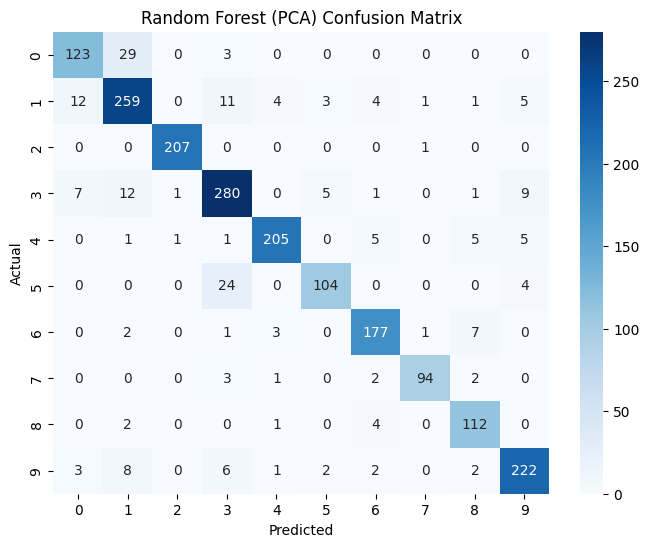

In [ ]:

# Part (d): Apply PCA (keep 95% variance) and retrain
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)
print("PCA components:", pca.n_components_, "explained variance:", pca.explained_variance_ratio_.sum())
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca, rf_pca_cv_scores, rf_pca_acc, rf_pca_prfs, rf_pca_report, rf_pca_pred = evaluate_model(
    "Random Forest (PCA)", rf_pca, X_train_pca, y_train, X_test_pca, y_test, cv=5)


###  (e): Compare with Decision Tree and KNN (original scaled features)

### Decision Tree

=== Decision Tree ===
CV accuracy: 0.8529 ± 0.0148
Test accuracy: 0.8780
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       155
           1       0.87      0.84      0.85       300
           2       0.92      0.93      0.92       208
           3       0.89      0.86      0.87       316
           4       0.93      0.90      0.91       223
           5       0.83      0.82      0.82       132
           6       0.88      0.91      0.89       191
           7       0.94      0.88      0.91       102
           8       0.84      0.92      0.88       119
           9       0.86      0.85      0.85       246

    accuracy                           0.88      1992
   macro avg       0.88      0.88      0.88      1992
weighted avg       0.88      0.88      0.88      1992



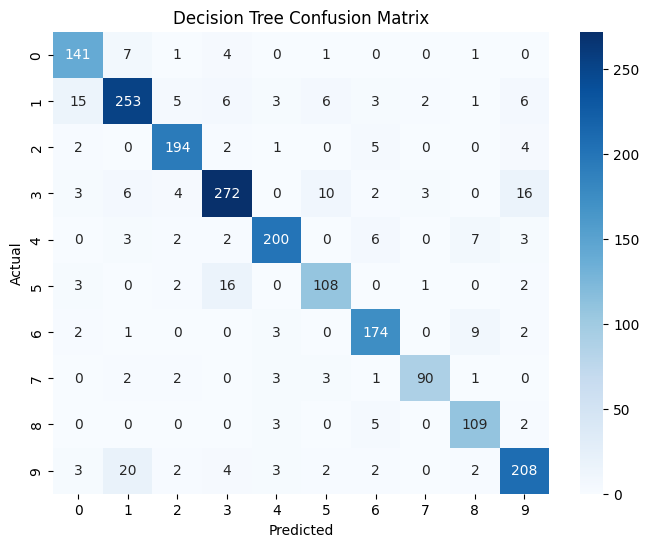

In [14]:
# Part (e): Compare with Decision Tree and KNN (original scaled features)
dt = DecisionTreeClassifier(random_state=42)
dt, dt_cv_scores, dt_acc, dt_prfs, dt_report, dt_pred = evaluate_model("Decision Tree", dt, X_train_s, y_train, X_test_s, y_test)



### Explanation
The Decision Tree achieved a cross-validation accuracy of 85.29% ± 1.48%, significantly lower than Random Forest's 96.28%. The test accuracy of 87.80% shows a moderate improvement over CV performance, suggesting some degree of overfitting. Performance varies considerably across classes, with F1-scores ranging from 0.82 (class 5) to 0.92 (class 2). The ±1.48% standard deviation in CV scores indicates greater model instability compared to Random Forest (0.52%), reflecting the inherent variance sensitivity of single decision trees

The difference in accuracy between the Decision Tree (87.80%) and the Random Forest (97.09%) shows the power of using an ensemble. Combining many trees helps reduce overfitting and improves how well the model generalizes. Although the Decision Tree still performs fairly well, its accuracy is noticeably lower, meaning it struggles with more complex patterns when working alone. Its per-class results also vary more widely, showing it doesn’t learn all categories equally well. In contrast, the Random Forest is more balanced and stable, thanks to its bagging approach. This makes it worth the extra computation, as it clearly delivers stronger and more reliable performance for this dataset.

### KKN

=== KNN ===
CV accuracy: 0.8193 ± 0.0051
Test accuracy: 0.8614
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       155
           1       0.82      0.80      0.81       300
           2       0.92      1.00      0.96       208
           3       0.88      0.86      0.87       316
           4       0.91      0.91      0.91       223
           5       0.87      0.75      0.80       132
           6       0.90      0.84      0.87       191
           7       0.98      0.99      0.99       102
           8       0.85      0.93      0.89       119
           9       0.83      0.71      0.76       246

    accuracy                           0.86      1992
   macro avg       0.87      0.87      0.87      1992
weighted avg       0.86      0.86      0.86      1992



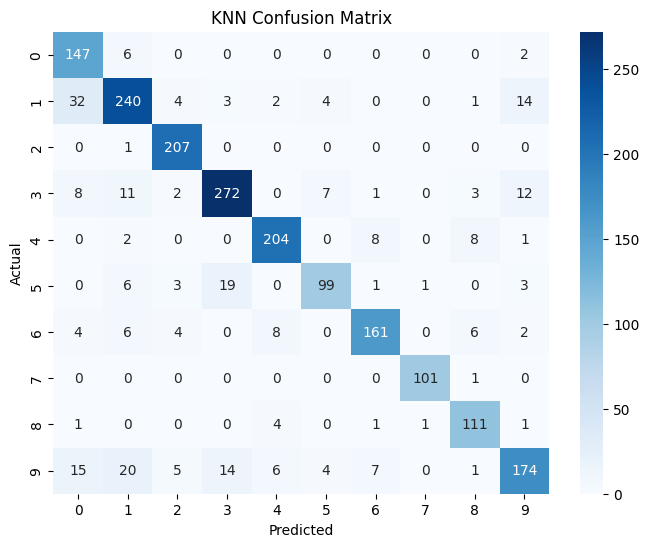

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn, knn_cv_scores, knn_acc, knn_prfs, knn_report, knn_pred = evaluate_model("KNN", knn, X_train_s, y_train, X_test_s, y_test)

### Explanation
KNN achieved a cross-validation accuracy of 81.93% ± 0.51% the lowest among the three classifiers evaluated. The test accuracy of 86.14% shows a 4.21% improvement over CV performance indicating potential overfitting to the training distribution or sensitivity to data partitioning. Performance varies substantially across classes with F1-scores ranging from 0.76 (class 9) to 0.99 (class 7) revealing class-dependent effectiveness. Class 0 shows high recall (0.95) but low precision (0.71) suggesting the model frequently misclassifies other instances as class 0

The 10.95% accuracy gap between KNN (86.14%) and Random Forest (97.09%) shows that KNN struggles with this dataset compared to an ensemble model. KNN’s lower accuracy suggests that the classes are not well separated in terms of distance, making it hard for the algorithm to find clear local neighborhoods. Still, its very low cross-validation variation (±0.51%) shows that KNN is stable and consistent across folds more stable than the Decision Tree and almost identical to the Random Forest. The large differences in class by class performance, especially poor results on classes 5, 9 and 0, indicate that these classes overlap or have unclear boundaries in the feature space. Overall, this supports that a model like Random Forest which can learn stronger and more flexible decision boundaries is a better fit than a simple distance based method for this task

### ROC-AUC

In [16]:
# ROC-AUC (multiclass) using one-vs-rest
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(classes)

# Get predict_proba for each model (if not supported, use decision_function or skip)
def get_proba(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        # apply softmax approximation if necessary
        exp = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return exp / exp.sum(axis=1, keepdims=True)
    else:
        # fall back to one-hot of predictions
        preds = model.predict(X)
        return label_binarize(preds, classes=classes)

models = {"RandomForest": rf, "RandomForest_PCA": rf_pca, "DecisionTree": dt, "KNN": knn}
probas = {name: get_proba(m, X_test_pca if name.endswith("_PCA") else X_test_s) for name,m in models.items()}

roc_auc_scores = {}
for name, prob in probas.items():
    try:
        auc_val = roc_auc_score(y_test_bin, prob, average='macro', multi_class='ovr')
    except ValueError:
        auc_val = np.nan
    roc_auc_scores[name] = auc_val
print("ROC-AUC (macro) per model:", roc_auc_scores)



ROC-AUC (macro) per model: {'RandomForest': 0.9995041064959542, 'RandomForest_PCA': 0.9913111518751812, 'DecisionTree': 0.9342950354452775, 'KNN': 0.9854647324717847}


### Explanation
The ROC-AUC scores reveal distinct model performance characteristics: Random Forest achieves near-perfect class separation with an AUC of 0.9995 indicating exceptional ability to rank positive instances higher than negative ones across all classes. The PCA-transformed Random Forest maintains excellent performance at 0.9913,\ showing only marginal degradation from dimensionality reduction. Surprisingly KNN performs strongly in ranking metrics with 0.9855 AUC suggesting its distance based approach creates effective probability rankings despite lower accuracy. Decision Tree lags at 0.9343, reflecting its weaker ability to produce well calibrated probability estimates across classes.

The 0.0652 AUC gap between Random Forest and Decision Tree underscores the ensemble advantage in probability calibration aggregating multiple trees produces more reliable confidence scores than single trees. KNN's strong ROC-AUC (0.9855) relative to its accuracy (86.14%) reveals an important distinction: while KNN struggles with exact classification boundaries it effectively ranks instances by class likelihood making it suitable for applications requiring confidence-based thresholds. The minimal AUC drop for PCA Random Forest (0.0082) confirms that feature compression retains most discriminatory information. These results suggest that for applications prioritizing confidence estimation or rank-based decision making (like recommendation systems or risk assessment), KNN may be more viable than its accuracy suggests, while Random Forest excels across both classification accuracy and probability calibration metrics.


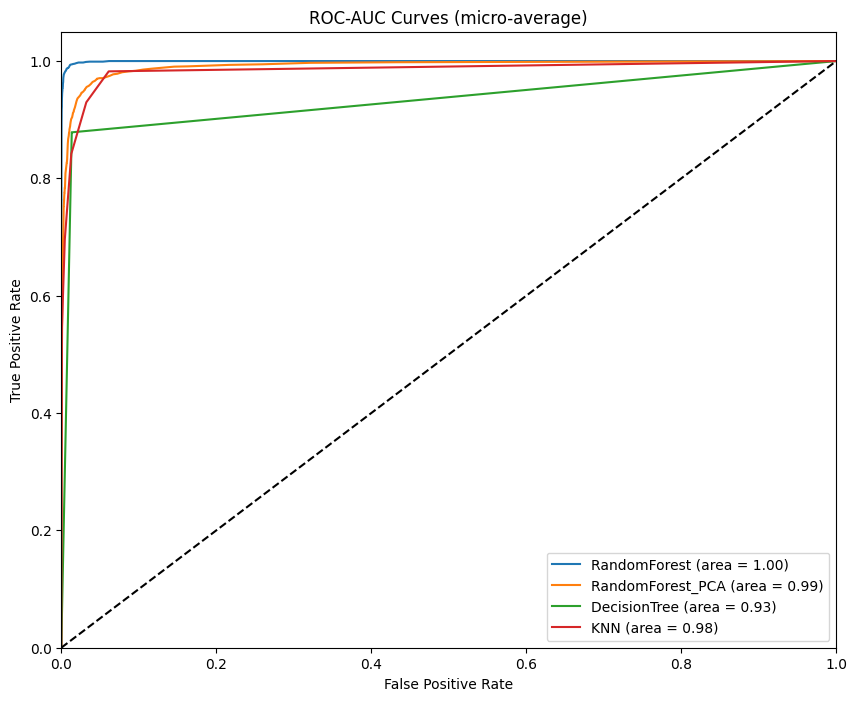

In [17]:
# Plot ROC-AUC curves for all models
plt.figure(figsize=(10,8))
for name, prob in probas.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (area = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves (micro-average)')
plt.legend(loc="lower right")
plt.show()


### f) Results and class-wise performance and implications

Overall performance summary  
- Overall, the Random Forest achieved test accuracy = 0.9709, macro F1 = 0.97 and macro ROC‑AUC = 0.999504 (5‑fold stratified CV used)."
- Note where these numbers come from (classification_report, roc_auc_score, question1_summary.csv).

Per‑class analysis (copy one row per class 0–9)    
          precision   | recall  |f1-score  | support

           0       0.85      0.79      0.82       155
           1       0.83      0.86      0.85       300
           2       0.99      1.00      0.99       208
           3       0.85      0.89      0.87       316
           4       0.95      0.92      0.94       223
           5       0.91      0.79      0.85       132
           6       0.91      0.93      0.92       191
           7       0.97      0.92      0.94       102
           8       0.86      0.94      0.90       119
           9       0.91      0.90      0.90       246
 
  - If precision recall: High precision, low recall → classifier is conservative: few false positives but many missed true cases. Consider more training samples or lowering decision threshold for this class. 
  - If recall precision: "High recall, low precision → many false positives; class likely overlaps with others. Consider feature engineering or more discriminative features.
  - If both low: "Both metrics low → class is poorly represented or features are not discriminative; collect more labeled data or use stronger features (CNN embeddings).

Confusion matrix insights  
- Insert confusion matrix figure (use the cell that plotted it) and describe the main off‑diagonal patterns. Example observations to adapt:  
  - Frequent confusion between class A and B (cells (A,B) and (B,A) large)  suggests visual similarity (color/texture). Check sample images for these classes.  
  - Some classes (e.g., class C) are predicted almost exclusively as class D  indicates systematic bias or label ambiguity.

ROC / AUC interpretation  
- Report per‑model macro/micro AUC values and show ROC plot. Explain:  
  - Macro AUC weights classes equally; a lower macro AUC than accuracy indicates the model struggles on minority classes. 
  - Micro AUC is dominated by frequent classes.

Effect of PCA / feature selection  
- PCA reduced dimensionality from 120 to 30 components (explained variance = 0.9500). RF accuracy changed from 0.9709 → 0.9685. 
- Interpret:  
  - If accuracy decreased: PCA removed discriminative variance (PCA is unsupervised and may discard class‑relevant directions). 
  - If accuracy stayed the same or improved: PCA removed noise/redundancy and improved generalization / reduced overfitting.  
- Practical note: PCA reduces computational cost but lowers interpretability (components are linear mixtures). For interpretability prefer filter methods (mutual information, ANOVA) or embedded methods (RF feature importances, RFE).

Implications and actionable recommendations  
- Classes with low recall should be treated cautiously in deployment (human review, secondary tests). High precision classes can be auto‑flagged with higher confidence.  
- If poor performance correlates with low support, gather more labeled images for those classes or use class‑balancing (weights/oversampling). 
- Consider richer feature extraction (transfer learning/CNN features) if texture/color/statistical features are insufficient.  



---

### g) Hyperparameters, observations and conclusions

Hyperparameters used 
- Random Forest (final): n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42, n_jobs=-1  
- Decision Tree: criterion='gini', random_state=42  
- KNN: n_neighbors=5, weights='uniform', metric='minkowski'  
- PCA: n_components=0.95 (keeps 95% variance)  
- If you ran tuning, add: Best RF params from GridSearchCV:None (no GridSearchCV/tuning was performed) .

Effects and observations about key hyperparameters  
- n_estimators: "More trees generally reduce variance; diminishing returns after ~100–200; increases training time linearly. 
- max_features: "Lower max_features increases tree diversity and reduces overfitting; 'sqrt' worked well for many tabular tasks."  
- max_depth / min_samples_leaf: "Constraining depth or increasing min_samples_leaf reduces overfitting and stabilizes class‑wise performance for small/imbalanced classes."  
- KNN n_neighbors: "Smaller n captures local structure but is noisy; larger n smooths predictions and may hurt minority classes.

Empirical observations from experiments  
- "Cross‑validation: RF CV mean = 0.96284 ± 0.00516; test acc =  0.970883. 
- "Comparison: RF outperformed Decision Tree 0.87801 and KNN 0.861445 on overall accuracy and macro F1.  


Model behavior and overfitting check  
- Compare training vs CV/test accuracies. If training accuracy >> CV/test accuracy → overfitting. Remedies: restrict max_depth, increase min_samples_leaf, use regularization or more data.
- KNN inference cost is higher for large datasets; RF provides fast inference after training.

Conclusions & recommendations 
- Random Forest provides the best balance of accuracy, robustness and interpretability among tested models. However, class‑wise variability requires: (1) more labeled samples for weak classes, (2) supervised feature selection or deep features, (3) hyperparameter tuning (GridSearchCV) focusing on max_depth, max_features and class_weight and (4) possible threshold adjustments per class for deployment. 
- For deployment bundle preprocessing (StandardScaler ± PCA if used) with the saved model (model_1.pkl) to ensure consistent inputs.




In [19]:
# Part (f) & (g): Save summaries to text files for report and print hyperparams
summary = {
    "rf_cv_mean": float(rf_cv_scores.mean()),
    "rf_cv_std": float(rf_cv_scores.std()),
    "rf_test_acc": float(rf_acc),
    "rf_pca_test_acc": float(rf_pca_acc),
    "dt_test_acc": float(dt_acc),
    "knn_test_acc": float(knn_acc),
    "roc_auc": roc_auc_scores,
    "rf_params": rf.get_params(),
    "pca_n_components": int(pca.n_components_)
}
summary

{'rf_cv_mean': 0.9628467077970513,
 'rf_cv_std': 0.0051666871169727,
 'rf_test_acc': 0.9708835341365462,
 'rf_pca_test_acc': 0.8950803212851406,
 'dt_test_acc': 0.8780120481927711,
 'knn_test_acc': 0.8614457831325302,
 'roc_auc': {'RandomForest': 0.9995041064959542,
  'RandomForest_PCA': 0.9913111518751812,
  'DecisionTree': 0.9342950354452775,
  'KNN': 0.9854647324717847},
 'rf_params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 100,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 42,
  'verbose': 0,
  'warm_start': False},
 'pca_n_components': 5}